Basic data visualization on a map
==========
Demo script to show all basic plot types on the map.

This example requires the psy-maps plugin and the file ```'demo.nc'``` which contains one variable for the temperature, one for zonal and one for the meridional wind direction.

In [1]:
import psyplot.project as psy
%matplotlib inline
%config InlineBackend.close_figures = False
# we show the figures after they are drawn or updated. This is useful for the 
# visualization in the ipython notebook
psy.rcParams['auto_show'] = True

Visualizing scalar fields
-------------

The *mapplot* method visualizes scalar data on a map.

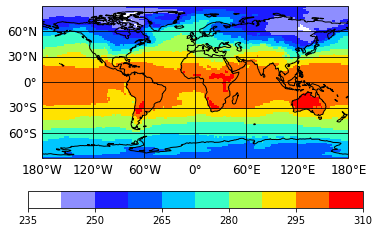

In [2]:
maps = psy.plot.mapplot('demo.nc', name='t2m')

To show the colorbar label we can use the *clabel* formatoption keyword and use one of the predefined labels.
Furthermore we can use the *cmap* formatoption to see one of the many available colormaps

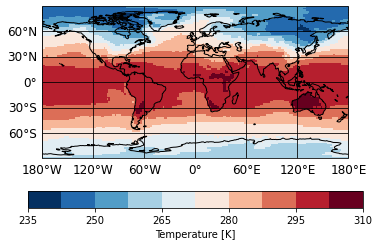

In [3]:
maps.update(clabel='{desc}', cmap='RdBu_r')

Especially useful formatoption keywords are

* projection: To modify the projection on which we draw
* lonlatbox: To select only a specific slice
* xgrid and ygrid: to disable, enable or modify the latitude-longitude grid

To use an orthogonal projection, we change the projection keyword to

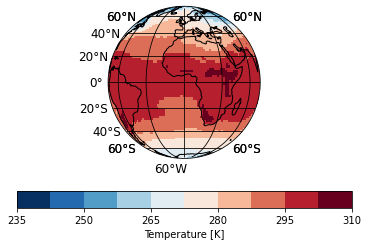

In [4]:
maps.update(projection='ortho')

To focus on Europe and disable the latitude-longitude grid, we can set

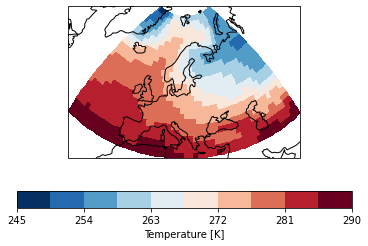

In [5]:
maps.update(lonlatbox='Europe', xgrid=False, ygrid=False)

There are many more formatoption keys that you can explore in the online-documentation or via

In [6]:
psy.plot.mapplot.keys(grouped=True)

******************
Axes formatoptions
******************
+------------+------------+------------+
| background | tight      | transpose  |
+------------+------------+------------+

**************************
Color coding formatoptions
**************************
+-------------+-------------+-------------+-------------+
| bounds      | cbar        | cbarspacing | cmap        |
+-------------+-------------+-------------+-------------+
| ctickprops  | cticksize   | ctickweight | extend      |
+-------------+-------------+-------------+-------------+
| levels      | miss_color  |             |             |
+-------------+-------------+-------------+-------------+

*******************
Label formatoptions
*******************
+----------------+----------------+----------------+----------------+
| clabel         | clabelprops    | clabelsize     | clabelweight   |
+----------------+----------------+----------------+----------------+
| figtitle       | figtitleprops  | figtitlesize   | figtitle

In [7]:
psy.close('all')  # we close the project because we create other figures below

Visualizing vector data
---------------

The *mapvector* method can visualize vectorized data on a map. But note that it needs a list in a list list to make the plot, where the first variable (here ```'u'```) is the wind component in the x- and the second (here ```'v'```) the wind component in the y-direction.

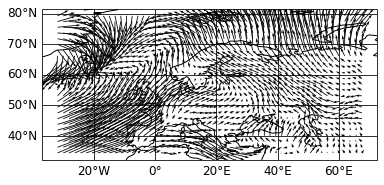

In [8]:
mapvectors = psy.plot.mapvector('demo.nc', name=[['u', 'v']], lonlatbox='Europe', 
                                arrowsize=100)

The plotter supports all formatoptions that the *mapplot* method supports. The *plot* formatoption furthermore supplies the ```'stream'``` value in order to make a streamplot

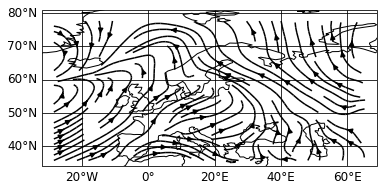

In [9]:
mapvectors.update(plot='stream', arrowsize=None)

and we have two possibities to visualize the strength of the wind, either via the color coding

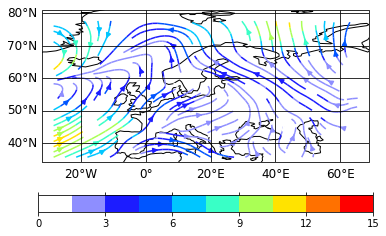

In [10]:
mapvectors.update(color='absolute')

or via the linewidth

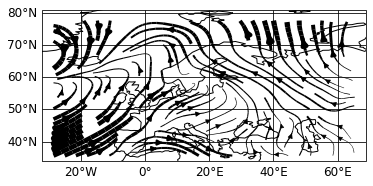

In [11]:
mapvectors.update(color='k', linewidth=['absolute', 0.5])

The second number for the linewidth scales the linewidth of the arrows, where the default number is 1.0

In [12]:
psy.close('all')

Visualizing combined scalar and vector data
-------------
The *mapcombined* method can visualize a scalar field (here temperature) with overlayed vector field. This method needs 3 variables: one for the scalar field and two for the wind fields. The calling format is 

```python
psy.plot.mapcombined(filename, name=[['<scalar variable name>', ['<x-vector>', '<y-vector>']]])
```

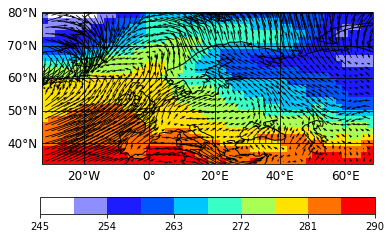

In [13]:
maps = psy.plot.mapcombined('demo.nc', name=[['t2m', ['u', 'v']]], lonlatbox='Europe', 
                            arrowsize=100)

We can also modify the color coding etc. here, but all the formatoptions that affect the vector color coding start with ```'v'``` 

In [14]:
psy.plot.mapcombined.keys('colors')

+--------------+--------------+--------------+--------------+
| color        | vcbar        | vcbarspacing | vcmap        |
+--------------+--------------+--------------+--------------+
| vbounds      | vcticksize   | vctickweight | vctickprops  |
+--------------+--------------+--------------+--------------+
| cbar         | bounds       | levels       | miss_color   |
+--------------+--------------+--------------+--------------+
| cmap         | extend       | cbarspacing  | cticksize    |
+--------------+--------------+--------------+--------------+
| ctickweight  | ctickprops   |              |              |
+--------------+--------------+--------------+--------------+


For example, let's modify the wind vector plots color coding and place a colorbar on the right side

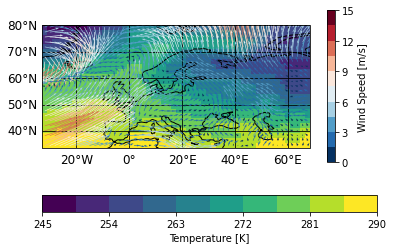

In [15]:
maps.update(color='absolute', cmap='viridis', vcmap='RdBu_r', vcbar='r', 
            clabel='{desc}', vclabel='Wind Speed [%(units)s]')

Summary
-------
To sum it all up:

* The *mapplot* method visualizes scalar fields
* The *mapvector* method visualizes vector fiels
* The *mapcombined* method visualizes scalar and vector fields

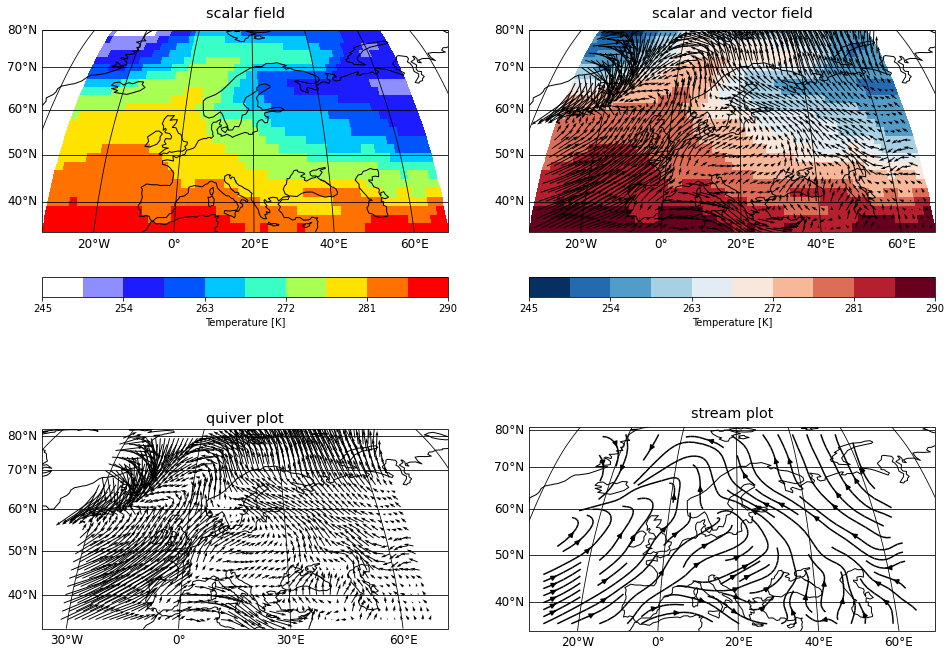

In [16]:
# create the subplots
axes = psy.multiple_subplots(2, 2, n=4, for_maps=True)
# disable the automatic showing of the figures
psy.rcParams['auto_show'] = False
# create plots for the scalar fields
maps = psy.plot.mapplot('demo.nc', name='t2m', clabel='{desc}', ax=axes[0], 
                        title='scalar field')
# create plots for scalar and vector fields
combined = psy.plot.mapcombined(
    'demo.nc', name=[['t2m', ['u', 'v']]], clabel='{desc}', arrowsize=100, 
    cmap='RdBu_r', ax=axes[1], title='scalar and vector field')
# create two plots for vector field
mapvectors = psy.plot.mapvector('demo.nc', name=[['u', 'v'], ['u', 'v']], 
                                ax=axes[2:])
# where one of them shall be a stream plot
mapvectors[0].psy.update(arrowsize=100, title='quiver plot')
mapvectors[1].psy.update(plot='stream', title='stream plot')
# now update all to a robin projection
p = psy.gcp(True)
with p.no_auto_update:
    p.update(projection='robin', titlesize='x-large')
    # and the one with the wind fields to focus on Europe
    p[1:].update(lonlatbox='Europe')
    p.start_update()

In [17]:
psy.close('all')